<a href="https://colab.research.google.com/github/charles01george/Humans_or_not_Sample/blob/main/Humans_or_not_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import and become one with the data

In [1]:
import os
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
data = "/content/drive/MyDrive/Humans_or_Not_Sample_project"

In [3]:
os.listdir(data)

['Test', 'Train', 'Sample']

In [4]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/Humans_or_Not_Sample_project/Train")  # turn training path into a python path
class_names = np.array([item.name for item in data_dir.glob('*')])
print(class_names)

['Not_Humans' 'Humans']


In [5]:
# View random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(data_dir, target_class):
  # Setup target directory
  target_folder = data_dir + target_class
  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (4624, 3468, 3)


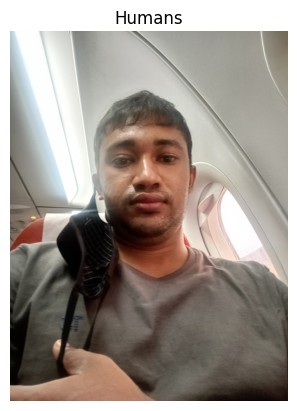

In [6]:
# Visualize the data
img = view_random_image(data_dir="/content/drive/MyDrive/Humans_or_Not_Sample_project/Train/",
                    target_class="Humans")

In [7]:
# View the image (array/tensor)
img

array([[[184, 203, 218],
        [184, 203, 218],
        [185, 204, 219],
        ...,
        [113, 104,  87],
        [113, 104,  87],
        [113, 104,  87]],

       [[ 97, 108, 114],
        [ 96, 107, 113],
        [ 95, 108, 116],
        ...,
        [113, 104,  87],
        [113, 104,  87],
        [113, 104,  87]],

       [[204, 198, 184],
        [202, 198, 186],
        [200, 197, 188],
        ...,
        [112, 103,  86],
        [113, 104,  87],
        [113, 104,  87]],

       ...,

       [[120,  79,  57],
        [118,  77,  55],
        [117,  76,  54],
        ...,
        [ 27,  17,  15],
        [ 27,  17,  15],
        [ 25,  15,  13]],

       [[113,  72,  50],
        [111,  70,  48],
        [111,  70,  48],
        ...,
        [ 24,  14,  12],
        [ 23,  13,  11],
        [ 21,  11,   9]],

       [[103,  62,  40],
        [103,  62,  40],
        [105,  64,  42],
        ...,
        [ 21,  11,   9],
        [ 20,  10,   8],
        [ 18,   8,   6]]

In [8]:
# Image shape
img.shape

(4624, 3468, 3)

Image shape: (864, 1152, 3)
Image shape: (3024, 4032, 3)


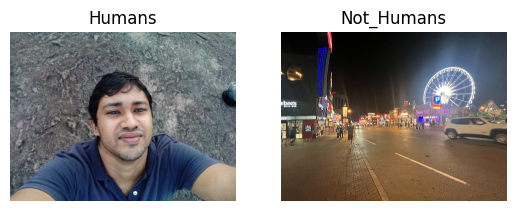

In [9]:
plt.figure()
plt.subplot(1, 2, 1)
humans = view_random_image("/content/drive/MyDrive/Humans_or_Not_Sample_project/Train/", "Humans")
plt.subplot(1, 2, 2)
not_humans = view_random_image("/content/drive/MyDrive/Humans_or_Not_Sample_project/Train/", "Not_Humans")

## 2. Preprocess the data(prepare it for a model)

Data is already split into training and test sets.

In [10]:
# Define training and test directory paths
train_dir = "drive/MyDrive/Humans_or_Not_Sample_project/Train/"
test_dir = "drive/MyDrive/Humans_or_Not_Sample_project/Test/"

Next step is to turn our data into batches

A batch is a small subset of the dataset a model looks at during training.I am using batch size of 32 and it has proven to be very effctive

To turn the data into batches, first create an instance of ImageDataGenerator for each of our datasets

In [11]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The rescale parameter, along with 1/255 is divide all of the pizel values by 255(image pixel values were between 0 and 255). This results in all of the images being imported and their pixel values being normalized (converted to be between 0 and 1)

Now got a coulple of ImageDataGenerator instances, it can load our images from their respective directories using the flow_from_directory method.

In [12]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),  # (height, width)
                                               class_mode="binary",     # classification problem type
                                               batch_size=4)           # how many images will be in each batch

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=4)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of imgaes/labels
len(images), len(labels)

(4, 4)

Images and labels are in batches of 4.

See what the images look like

In [14]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.48235297, 0.48235297, 0.48235297],
          [0.39607847, 0.4156863 , 0.43137258],
          [0.26666668, 0.33333334, 0.3647059 ],
          ...,
          [0.20784315, 0.28627452, 0.2901961 ],
          [0.20000002, 0.2784314 , 0.28235295],
          [0.19215688, 0.27058825, 0.27450982]],
 
         [[0.4901961 , 0.4901961 , 0.4901961 ],
          [0.43921572, 0.45882356, 0.47450984],
          [0.35686275, 0.42352945, 0.454902  ],
          ...,
          [0.21176472, 0.28627452, 0.3019608 ],
          [0.21176472, 0.28627452, 0.3019608 ],
          [0.20392159, 0.2784314 , 0.29411766]],
 
         [[0.48627454, 0.48627454, 0.49411768],
          [0.44705886, 0.4666667 , 0.48235297],
          [0.3803922 , 0.44705886, 0.47450984],
          ...,
          [0.20392159, 0.28235295, 0.30980393],
          [0.21960786, 0.29411766, 0.31764707],
          [0.2627451 , 0.32156864, 0.34117648]],
 
         ...,
 
         [[0.29803923, 0.37254903, 0.39607847],
          [0.28235

In [15]:
# View the first batch of labels
labels

array([0., 0., 1., 1.], dtype=float32)

## 3. Create a model (Baseline)

To begin with, it's good to build a smaller model to acquite a baseline result which you try to improve upon.

```In deep learning a smaller model often refers to a model with less layers than the state of the art. For instance, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers```

Take a smaller version of the model (3 layer convolutional neural network)

In [16]:
# Make the creating of our model a little easier
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [17]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_0 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (specify output shape)
])

In [18]:
# Compile the model
model_0.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

## 4. Fit the model

In [19]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(10, 5)

In [20]:
# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # number of batches a model will go through per epoch
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
10/10 [==============================] - 54s 5s/step - loss: 1.3503 - accuracy: 0.5000 - val_loss: 0.7400 - val_accuracy: 0.7000
Epoch 2/5
10/10 [==============================] - 8s 844ms/step - loss: 0.3492 - accuracy: 0.8000 - val_loss: 0.7469 - val_accuracy: 0.7000
Epoch 3/5
10/10 [==============================] - 7s 707ms/step - loss: 0.1694 - accuracy: 0.9750 - val_loss: 0.8774 - val_accuracy: 0.6500
Epoch 4/5
10/10 [==============================] - 8s 803ms/step - loss: 0.0872 - accuracy: 0.9750 - val_loss: 0.9853 - val_accuracy: 0.6500
Epoch 5/5
10/10 [==============================] - 8s 842ms/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 1.0694 - val_accuracy: 0.5500


## 5. Evaluate the model

Check out its trainig curves

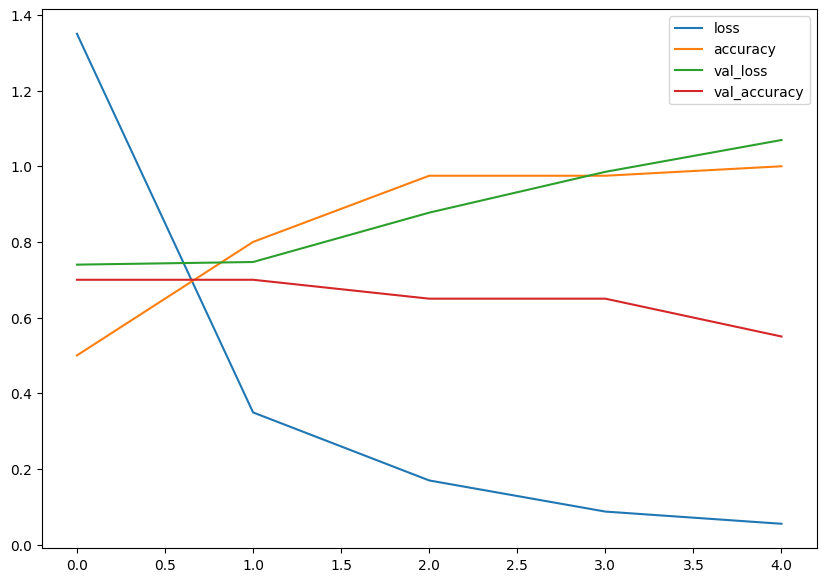

In [21]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_0.history).plot(figsize=(10, 7));

<!-- It looks like our model is overfitting the training dataset

> When a model's validation loss starts to increase, it's likely that it's overfitting the trainig dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished. -->



In [22]:
range(len(history_0.history['loss']))

range(0, 5)

In [23]:
# Plot the validation and training data seperately
def plot_loss_curve(history):
  """
  Returns seperate curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

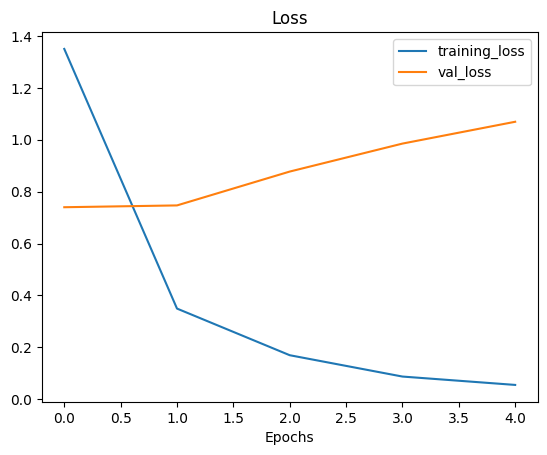

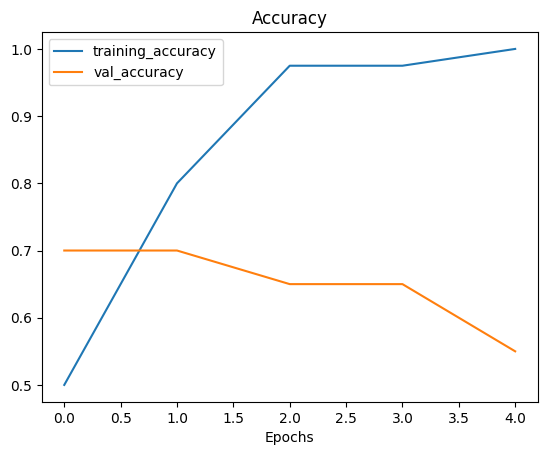

In [24]:
# Check out the loss curves of model_0
plot_loss_curve(history_0)

In [25]:
# Check out model's architecture
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<!-- ## 6. Reduce Overfitting -->
## 6. Data Augmentation

<!-- When a model performs too well on training data and poorly on unseen data, it is not much use.

To reduce overfitting -->

> Build a ConvNet with max pooling and data Augmentation

In [26]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,  # rotate the image slightly between 0 and 20 degrees
                                             shear_range=0.2,  # shear the image
                                             zoom_range=0.2,  # zoom into the image
                                             width_shift_range=0.2,  # shift the image width ways
                                             height_shift_range=0.2,  # shift the image height ways
                                             horizontal_flip=True)

In [27]:
# Import data and augment it from directories
train_datagen_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                               target_size=(224, 224),
                                                                               batch_size=8,
                                                                               class_mode='binary',
                                                                               shuffle=True)


Found 40 images belonging to 2 classes.


In [28]:
# Create the model
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [29]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [30]:
len(train_datagen_augmented_shuffled)

5

In [31]:
# Fit the model
history_1 = model_1.fit(train_datagen_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_datagen_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
5/5 [==============================] - 6s 1s/step - loss: 1.0382 - accuracy: 0.6000 - val_loss: 1.3250 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 7s 1s/step - loss: 0.8640 - accuracy: 0.5000 - val_loss: 0.8230 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 6s 1s/step - loss: 0.7618 - accuracy: 0.5250 - val_loss: 0.6076 - val_accuracy: 0.7500
Epoch 4/5
5/5 [==============================] - 6s 1s/step - loss: 0.6792 - accuracy: 0.5000 - val_loss: 0.5997 - val_accuracy: 0.5500
Epoch 5/5
5/5 [==============================] - 6s 1s/step - loss: 0.6598 - accuracy: 0.6000 - val_loss: 0.6096 - val_accuracy: 0.5000


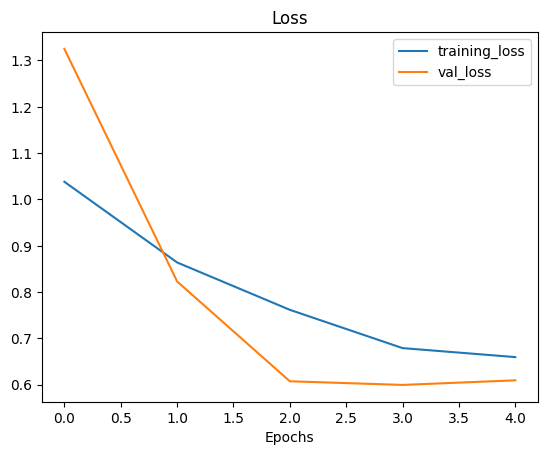

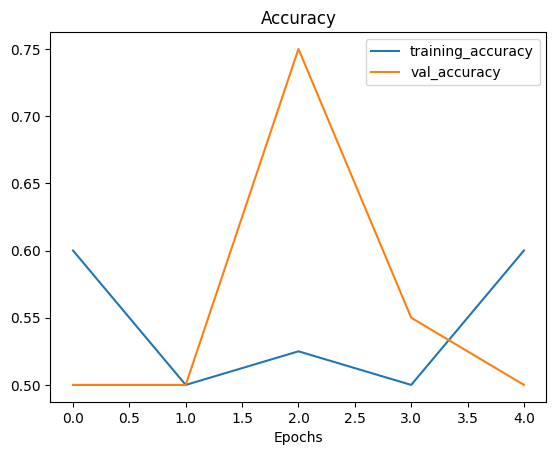

In [32]:
# Check model's performance history training on augmented data
plot_loss_curve(history_1)

Notice that how the performance on the training dataset improves as compared to model_0. This is because of the use of MaxPooling and Augmentation.

## 7. Making prediction with our trained model

I have been uploaded some images of humas and not_humas for predictions

In [33]:
# Classes we're working with
print(class_names)

['Not_Humans' 'Humans']


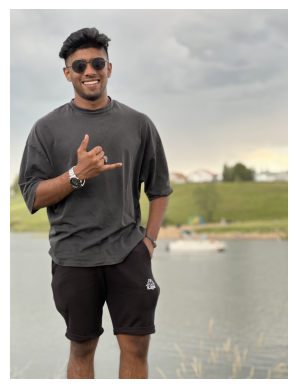

In [34]:
data = mpimg.imread("/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/IMG_2891.jpeg")
plt.imshow(data)
plt.axis(False);

In [35]:
# Check the shape of our image
data.shape

(4032, 3024, 3)

For model to make predictions on unseen data, the unseen data has to be in the same shape as your model has been trained on

In [36]:
# Create a function to import an image and resize it to be able to be used with model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape
  it to (img_shape, img_shape, colour_channel)
  """

  # Read in target file
  img = tf.io.read_file(filename)
  # Turn it into a tensor
  img = tf.image.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img/255.
  return img

In [37]:
# Load in an dpreprocess our custom image
data = load_and_prep_image("/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/154B218A-30B7-4DA5-ADBD-38DE0A971A6C.jpeg")
data

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3643057 , 0.37214884, 0.36038414],
        [0.44460782, 0.45245096, 0.44068626],
        [0.22826096, 0.22826096, 0.22826096],
        ...,
        [0.54420847, 0.5520516 , 0.606003  ],
        [0.6914335 , 0.68135   , 0.6578311 ],
        [0.904582  , 0.9085036 , 0.8457585 ]],

       [[0.39406773, 0.409754  , 0.41367558],
        [0.80641264, 0.8103342 , 0.7808624 ],
        [0.3013107 , 0.3013107 , 0.3013107 ],
        ...,
        [0.7058828 , 0.6957989 , 0.71750706],
        [0.54117966, 0.5408995 , 0.5488827 ],
        [0.8932757 , 0.89719725, 0.8422953 ]],

       [[0.4632053 , 0.47104844, 0.46236497],
        [0.73753494, 0.7329131 , 0.70308113],
        [0.59787947, 0.60180104, 0.5821932 ],
        ...,
        [0.8082441 , 0.7964794 , 0.7693082 ],
        [0.52441907, 0.52357846, 0.5339435 ],
        [0.83991474, 0.8320716 , 0.7810912 ]],

       ...,

       [[0.40367877, 0.4507376 , 0.43539137],
        [0.40

Add an extra axis to equalize our dimension

In [38]:
# Add an extra axis
print(f"Shape before new dimension: {data.shape}")
data = tf.expand_dims(data, axis=0)  # add an extra dimension at axis 0
print(f"Shape after new dimension: {data.shape}")

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


Our image has a batch size of 1, Let's make a prediction on it

In [39]:
# Make a prediction on our image tensor
pred = model_1.predict(data)
print(pred)

1/1 [==============================] - 0s 112ms/step
[[0.63589317]]


> We are working with binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is mostly likely to be the positive class (class 1). And if the prediction probability is under 0.5, the predicted class is most likely to be the negative class (class 0)

So let's write a little function to convert predictions into their class and then plot the target image

In [40]:
print(class_names)

['Not_Humans' 'Humans']


In [41]:
# Index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'Humans'

In [42]:
def pred_and_plot(model, filename, class_name):
  """
  Imports an image located at filename, make a prediction on it with
  a trained model and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediton
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predict the class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 37ms/step
[[0.6172782]]


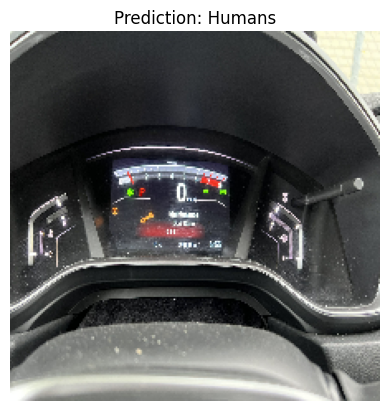

In [43]:
# Test our model on image
pred_and_plot(model_1, "/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/IMG_2735.jpeg", class_names)

1/1 [==============================] - 0s 32ms/step
[[0.59615606]]


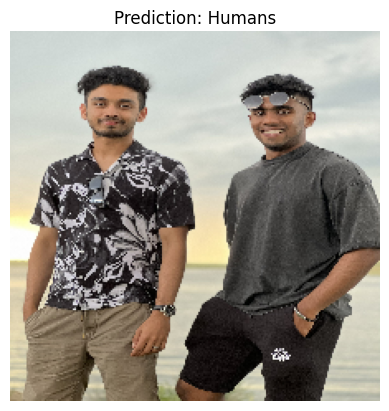

In [44]:
pred_and_plot(model_1, "/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/IMG_2929.jpeg", class_names)

1/1 [==============================] - 0s 29ms/step
[[0.6195491]]


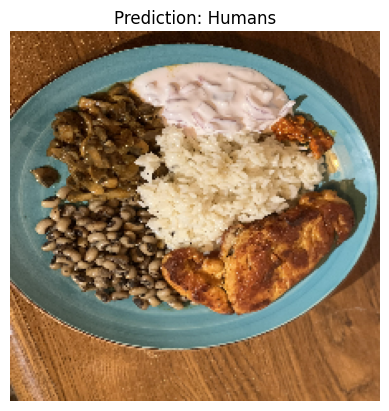

In [45]:
pred_and_plot(model_1, "/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/IMG_3239.jpeg", class_names)

## Building a Model with Inception V3 - Transfer learning

Inception V3 is a powerful image classification model

Before we build a model, there are a few things we need to define:

The input shape (our images shape, in the form of Tensors) to our model.

The output shape (image labels, in the form of Tensors) of our model.

The URL of the model we want to use from TensorFlow Hub -
https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3

In [46]:
# IMG_SIZE = 224

# # Setup input shape to the model
# INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels
# # Setup output shape of the model
# OUTPUT_SHAPE = len(class_names)
# # Setup model url from Tensorflow Hub
# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [47]:
# INPUT_SHAPE, OUTPUT_SHAPE

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

Takes the input shape, output shape and the model we've chosen as parameters.

Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).

Compiles the model (says it should be evaluated and improved).

Builds the model (tells the model the input shape it'll be getting).

Returns the model.
All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview



In [48]:
# # Create a function which builds a Keras model
# def create_model(INPUT_SHAPE, OUTPUT_SHAPE, MODEL_URL):
#   print("Building model with:", MODEL_URL)
#   # Setup the model layers
#   model = tf.keras.Sequential([
#               hub.KerasLayer(MODEL_URL),  # Layer 1 (input layer)
#               tf.keras.layers.Dense(units=1,   # Layer 2 (output layer)
#                                     activation='sigmoid')
#   ])
#   # Compile the model
#   model.compile(
#       loss=tf.keras.losses.CategoricalCrossentropy(),
#       optimizer=tf.keras.optimizers.Adam(),
#       metrics=['accuracy']
#   )
#   # Build the model
#   model.build(INPUT_SHAPE)

#   return model

In [49]:
# model = create_model(INPUT_SHAPE, OUTPUT_SHAPE, MODEL_URL)
# model.summary()

## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

The early stopping which prevents our model from training for too long.

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping





In [50]:
# # Create an early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
#                                                   patience=2)

## Training a Model

Let's create a function which trains a model.

- Create a model using create_model()

- Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use

- Return the model



In [51]:
# NUM_EPOCHS = 10

In [52]:
# len(train_data)

In [53]:
# # Build a function to train and return a trained model
# def train_model():
#   """
#   Trains a given model and returns the trained version.
#   """
#   # Create a mode
#   model = create_model(INPUT_SHAPE, OUTPUT_SHAPE, MODEL_URL)
#   # Fit the model to the data passing it the callbacks we created
#   model.fit(x=train_data,
#             epochs=10,
#             validation_data=test_data,
#             validation_freq=1,
#             callbacks=[early_stopping])
#   # Return the fitted model
#   return model

In [54]:
# model = train_model()

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor (e.g., validation loss)
                               patience=3,         # Number of epochs with no improvement to wait
                               restore_best_weights=True)  # Restore the best model weights

In [57]:
# history = model.fit(train_data,
#                     epochs=10,
#                     validation_data=test_data,
#                     callbacks=[early_stopping])

## Creating models using TensorFlow Hub

In the past we've used TensorFlow to create our own models layer by layer from scratch.

Now we're going to do a similar process, the majority of our model's layers are going to come from TensorFlow Hub.

`TenforFlow Hub : ` The TensorFlow Hub lets you search and discover hundreds of trained, ready-to-deploy machine learning models in one place

We can access pretrained models on: https://tfhub.dev/

Browsing the TensorFlow Hub page and sorting for image classification, we found the following feature vector model link: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [58]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [59]:
# INPUT_SHAPE = [IMG_SIZE, IMG_SIZE, 3]

In [60]:
# num_classes

In [61]:
# INPUT_SHAPE

In [62]:
# Create a function to create a model from a URL
def create_model(model_url, num_classes):
  """
  Takes a Tensorflow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the already learned patterns
                                           name="feature_extraction_lyaer",
                                           input_shape=(224, 224, 3))

  # Create our own model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(1, activation='sigmoid', name='output_layer')
  ])

  return model

## Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

The early stopping which prevents our model from training for too long.
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor (e.g., validation loss)
                               patience=2,         # Number of epochs with no improvement to wait
                               restore_best_weights=True)  # Restore the best model weights

## Creating and testing EfficientNetB0 TensorFlow Hub Feature Extraction model

In [65]:
# Create EfficinetNetB0 feature extractor model - details on EfficientNet: https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html#:~:text=EfficientNet%2DB0%20is%20the%20baseline,than%20the%20best%20existing%20CNN.
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=1)

# Compile EfficientNet model
efficientnet_model.compile(loss="binary_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

# Fit EfficientNet model to 10% of training data
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[early_stopping])


Epoch 1/5
10/10 [==============================] - 21s 1s/step - loss: 0.7534 - accuracy: 0.5250 - val_loss: 0.6056 - val_accuracy: 0.8500
Epoch 2/5
10/10 [==============================] - 6s 654ms/step - loss: 0.5010 - accuracy: 0.8750 - val_loss: 0.4920 - val_accuracy: 0.9000
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.3672 - accuracy: 0.9000 - val_loss: 0.4198 - val_accuracy: 0.9000
Epoch 4/5
10/10 [==============================] - 12s 1s/step - loss: 0.2810 - accuracy: 0.9750 - val_loss: 0.3701 - val_accuracy: 0.9500
Epoch 5/5
10/10 [==============================] - 8s 795ms/step - loss: 0.2227 - accuracy: 1.0000 - val_loss: 0.3343 - val_accuracy: 0.9500
